<a href="https://colab.research.google.com/github/leondowney/DCMS/blob/master/UOM_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer


# data import

In [ ]:

data = load_breast_cancer()
breast_df = pd.DataFrame(data.data, columns=data.feature_names)
breast_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 569 entries, 0 to 568
,Data columns (total 30 columns):
, #   Column                   Non-Null Count  Dtype  
,---  ------                   --------------  -----  
, 0   mean radius              569 non-null    float64
, 1   mean texture             569 non-null    float64
, 2   mean perimeter           569 non-null    float64
, 3   mean area                569 non-null    float64
, 4   mean smoothness          569 non-null    float64
, 5   mean compactness         569 non-null    float64
, 6   mean concavity           569 non-null    float64
, 7   mean concave points      569 non-null    float64
, 8   mean symmetry            569 non-null    float64
, 9   mean fractal dimension   569 non-null    float64
, 10  radius error             569 non-null    float64
, 11  texture error            569 non-null    float64
, 12  perimeter error          569 non-null    float64
, 13  area error               569 non-null    float64
, 14  smoothn

In [ ]:

diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 768 entries, 0 to 767
,Data columns (total 9 columns):
, #   Column                    Non-Null Count  Dtype  
,---  ------                    --------------  -----  
, 0   Pregnancies               768 non-null    int64  
, 1   Glucose                   768 non-null    int64  
, 2   BloodPressure             768 non-null    int64  
, 3   SkinThickness             768 non-null    int64  
, 4   Insulin                   768 non-null    int64  
, 5   BMI                       768 non-null    float64
, 6   DiabetesPedigreeFunction  768 non-null    float64
, 7   Age                       768 non-null    int64  
, 8   Outcome                   768 non-null    int64  
,dtypes: float64(2), int64(7)
,memory usage: 54.1 KB


# Exploratory analysis of data

In [ ]:
# Check for missing values
breast_df.isnull().any().any()

False

In [ ]:
print(breast_df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
,count   569.000000    569.000000      569.000000   569.000000   
,mean     14.127292     19.289649       91.969033   654.889104   
,std       3.524049      4.301036       24.298981   351.914129   
,min       6.981000      9.710000       43.790000   143.500000   
,25%      11.700000     16.170000       75.170000   420.300000   
,50%      13.370000     18.840000       86.240000   551.100000   
,75%      15.780000     21.800000      104.100000   782.700000   
,max      28.110000     39.280000      188.500000  2501.000000   
,
,       mean smoothness  mean compactness  mean concavity  mean concave points  \
,count       569.000000        569.000000      569.000000           569.000000   
,mean          0.096360          0.104341        0.088799             0.048919   
,std           0.014064          0.052813        0.079720             0.038803   
,min           0.052630          0.019380        0.000000             0.00000

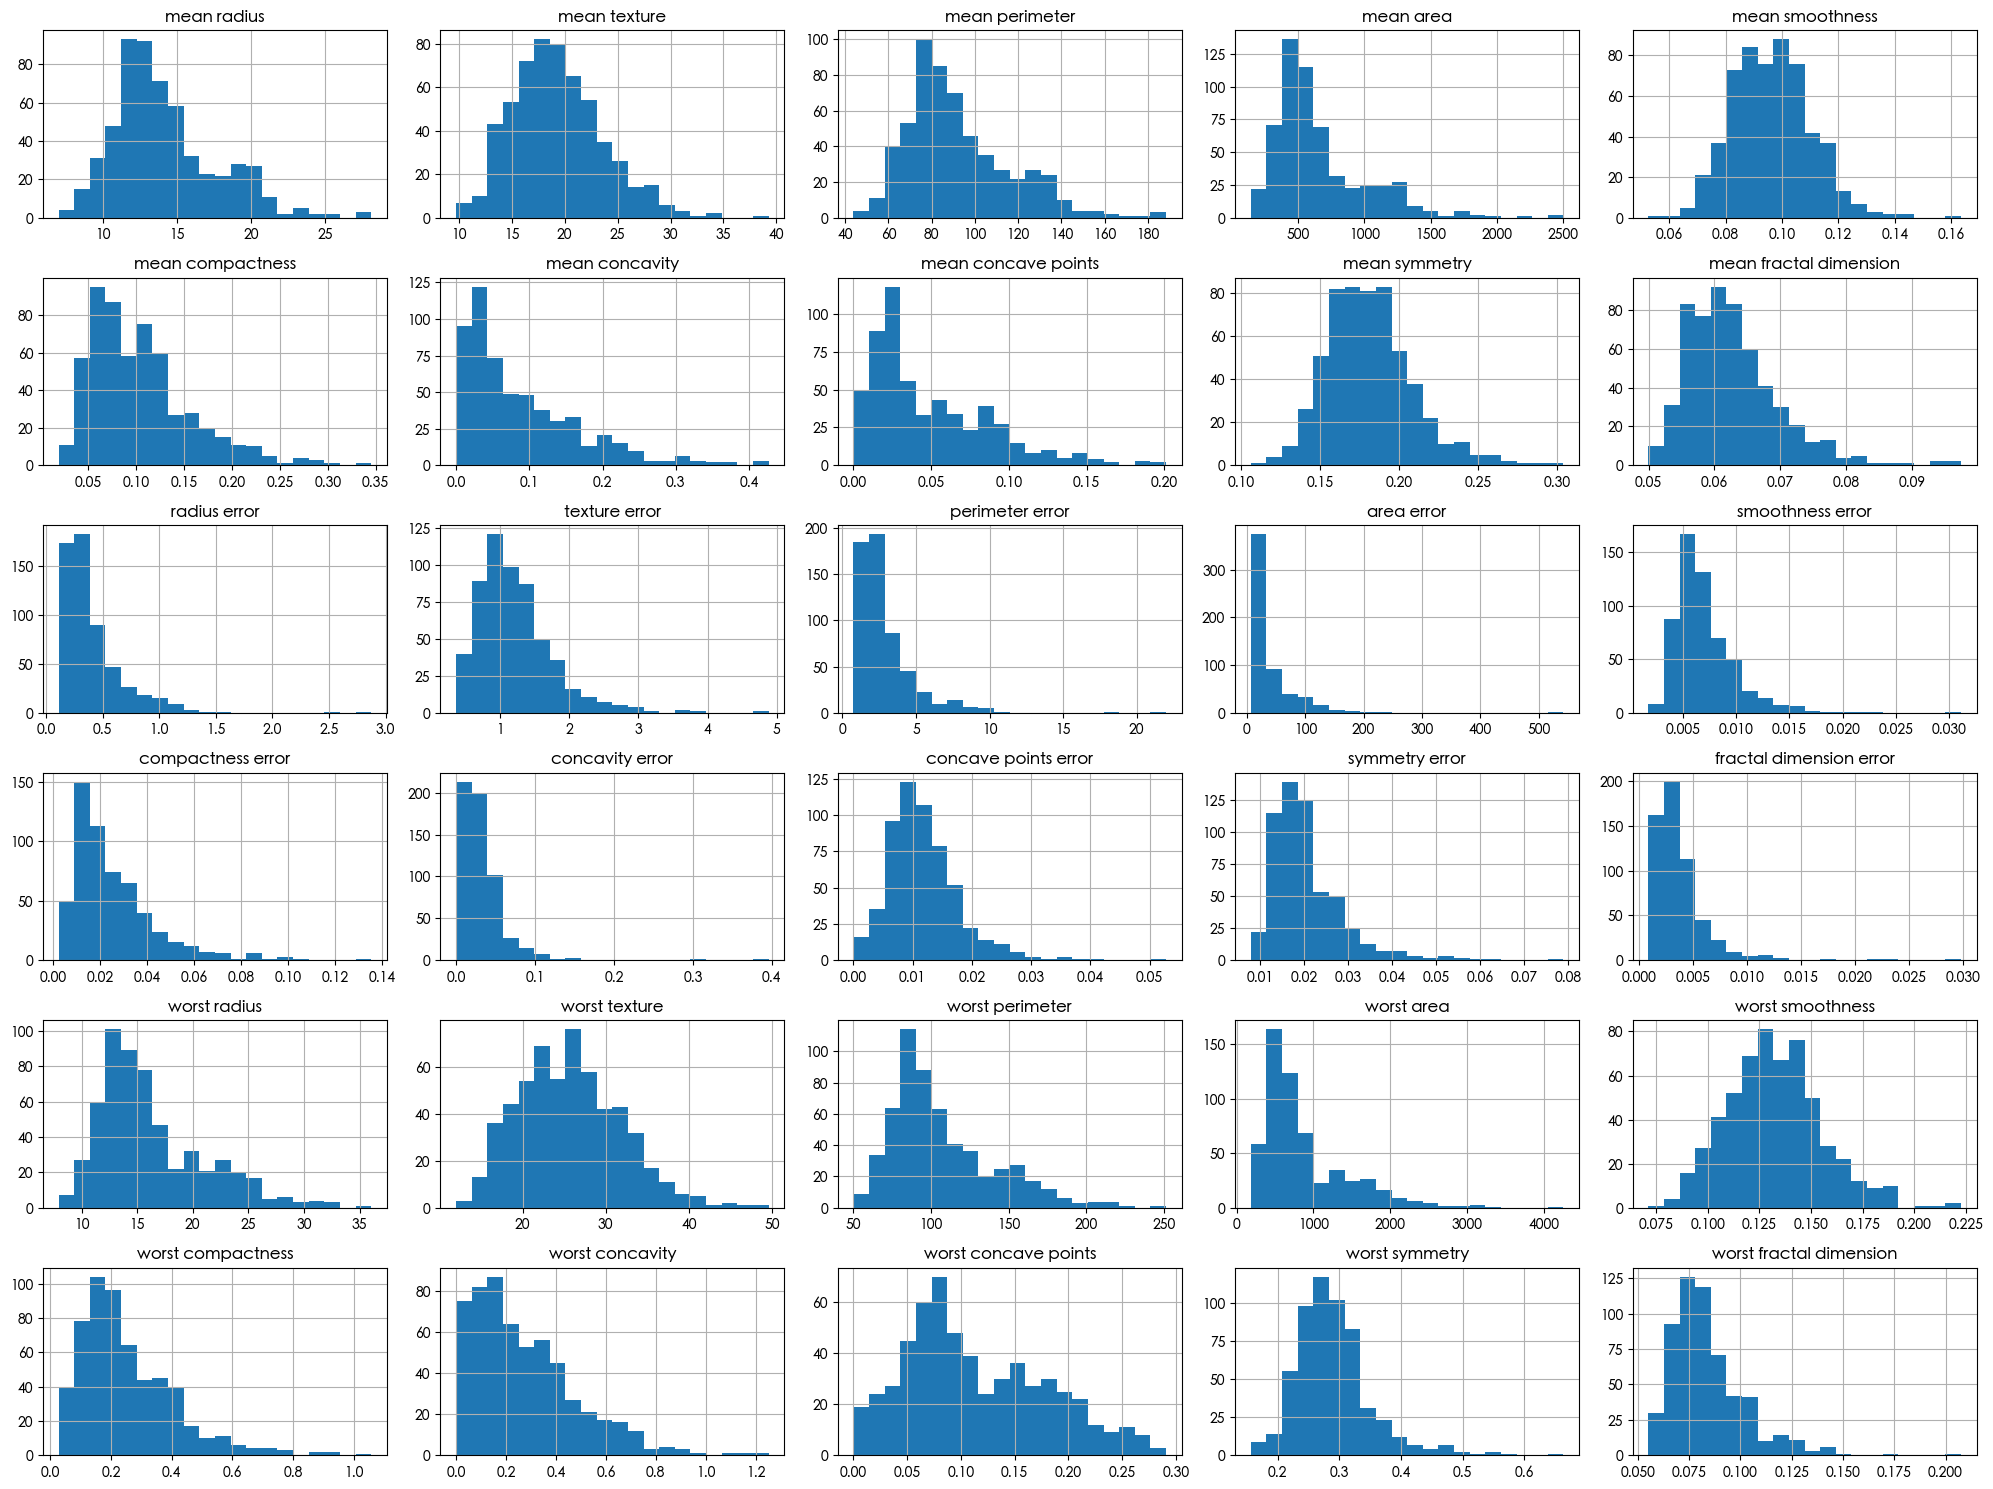

In [ ]:
breast_df.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

/Users/wuzonglin/opt/anaconda3/envs/e1/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
,  plot_data = [np.asarray(s, float) for k, s in iter_data]


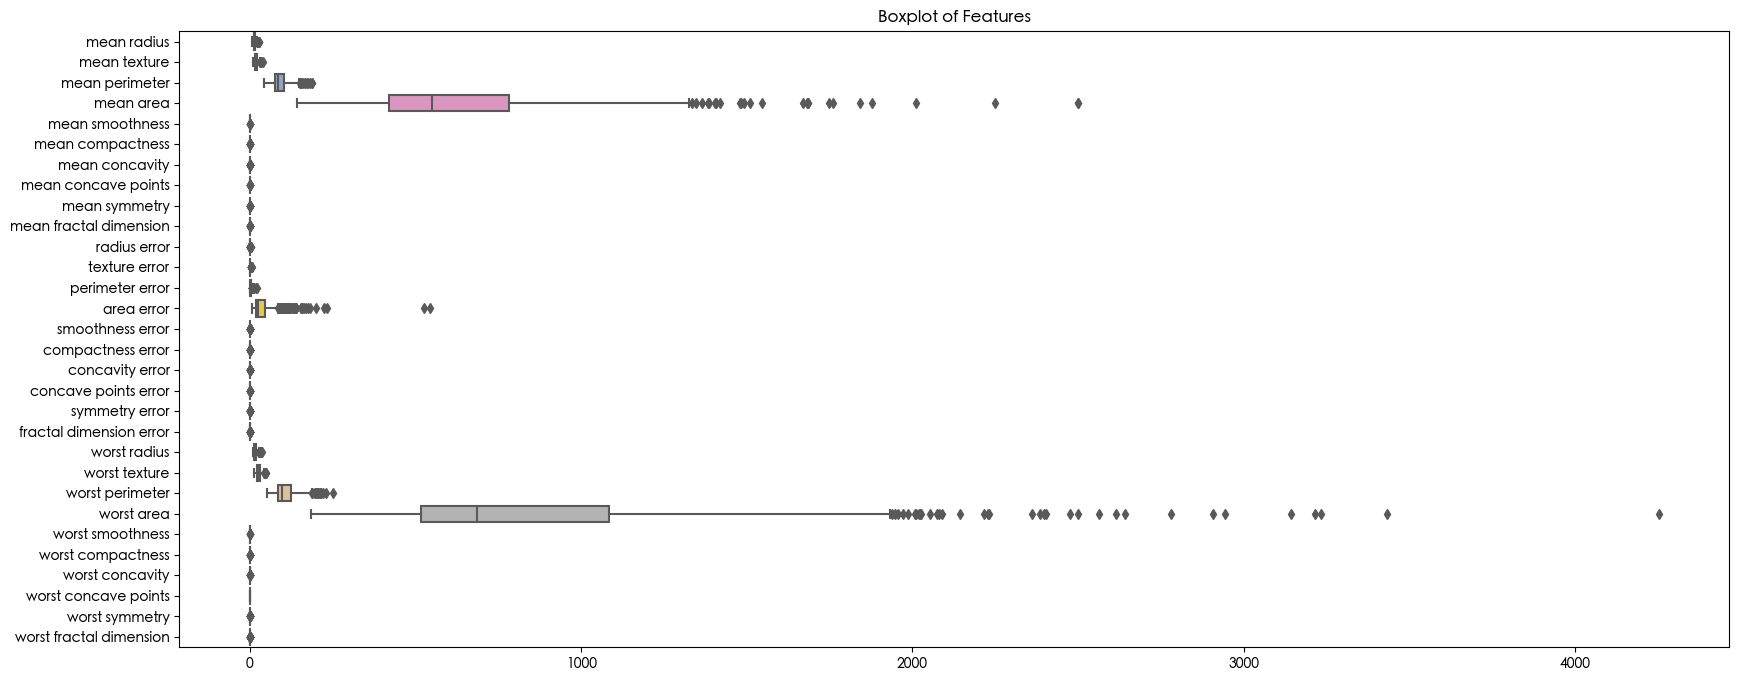

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=breast_df, orient="h", palette="Set2")
plt.title("Boxplot of Features")
plt.show()

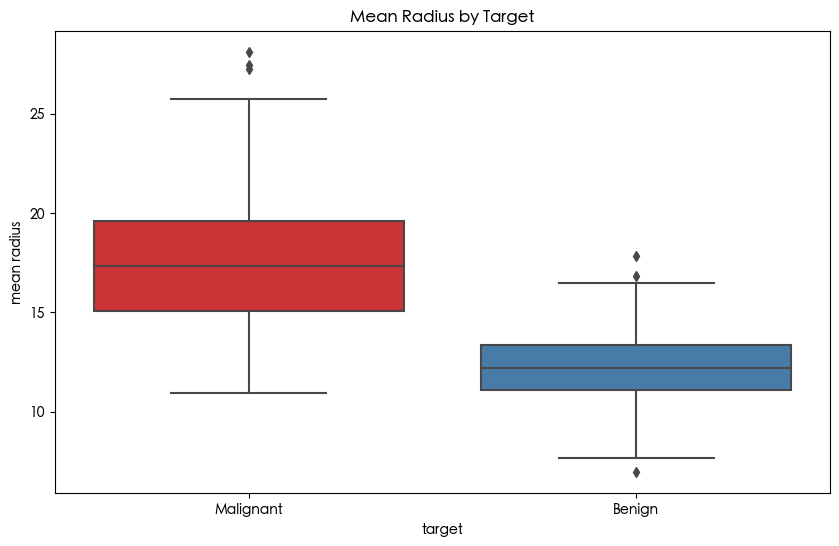

In [ ]:
breast_df['target'] = data.target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='mean radius', data=breast_df, palette="Set1")
plt.title("Mean Radius by Target")
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

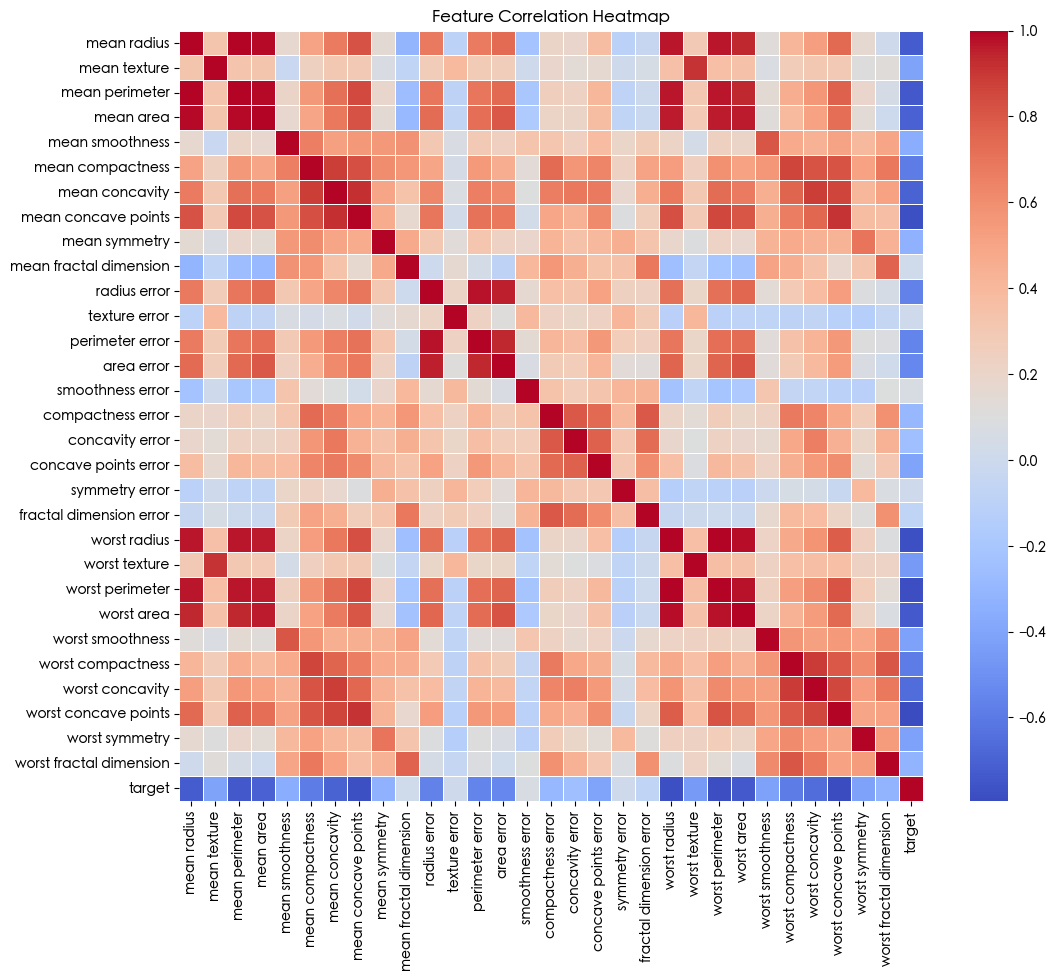

In [ ]:
corr_matrix = breast_df.corr()

# Correlation heat map
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Check for missing values
diabetes_df.isnull().any().any()

False

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


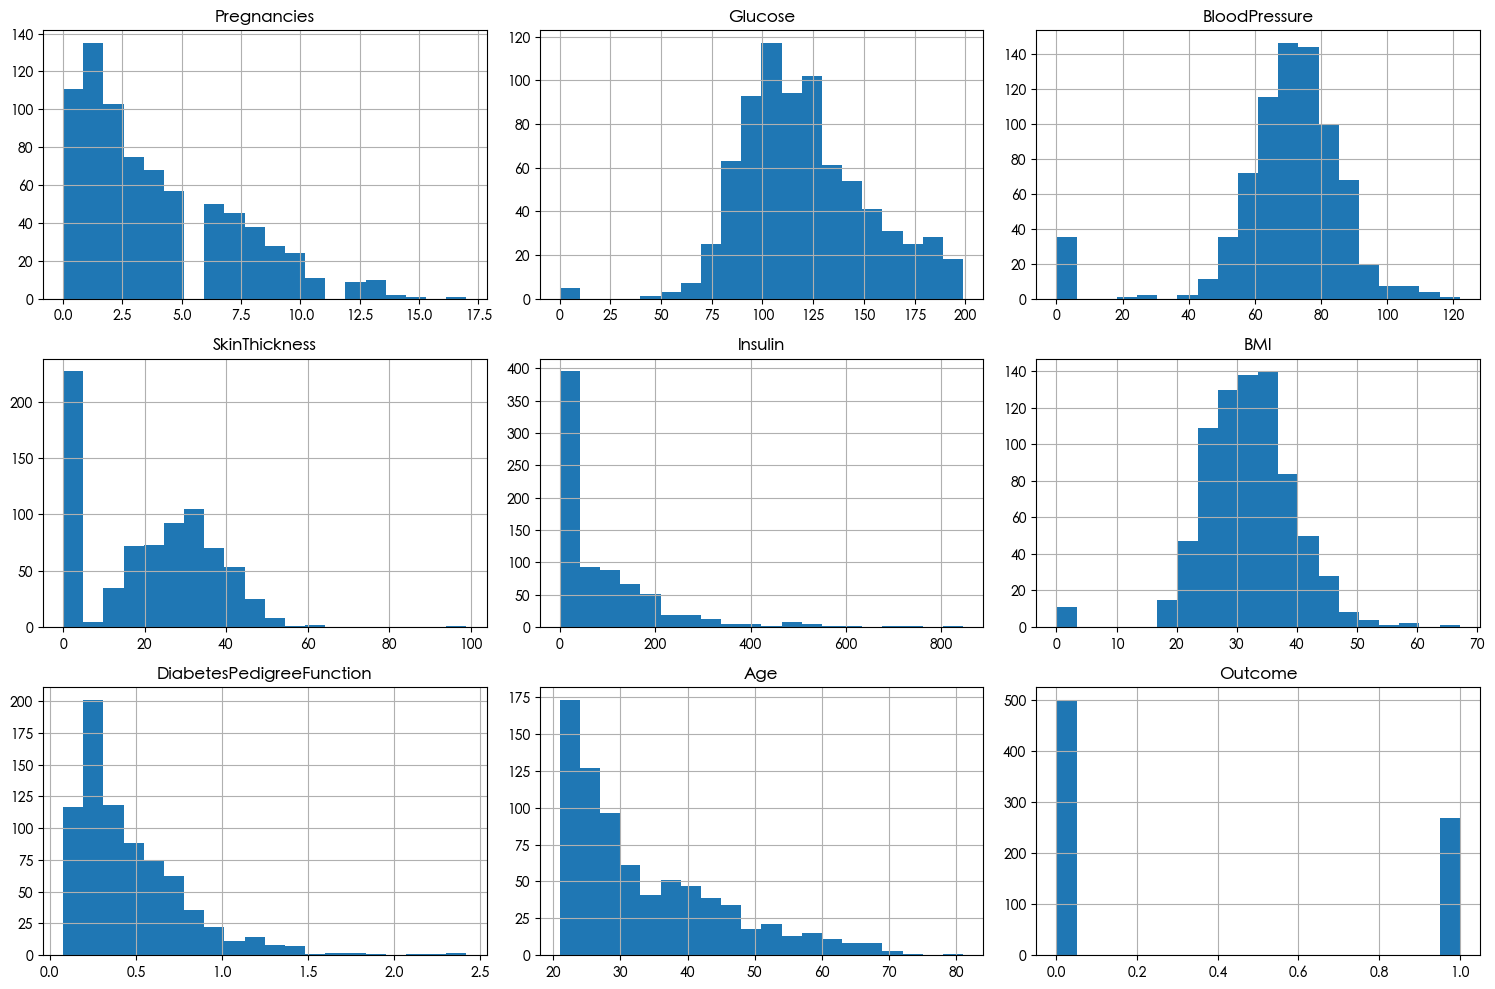

In [ ]:
diabetes_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

/Users/wuzonglin/opt/anaconda3/envs/e1/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
,  plot_data = [np.asarray(s, float) for k, s in iter_data]


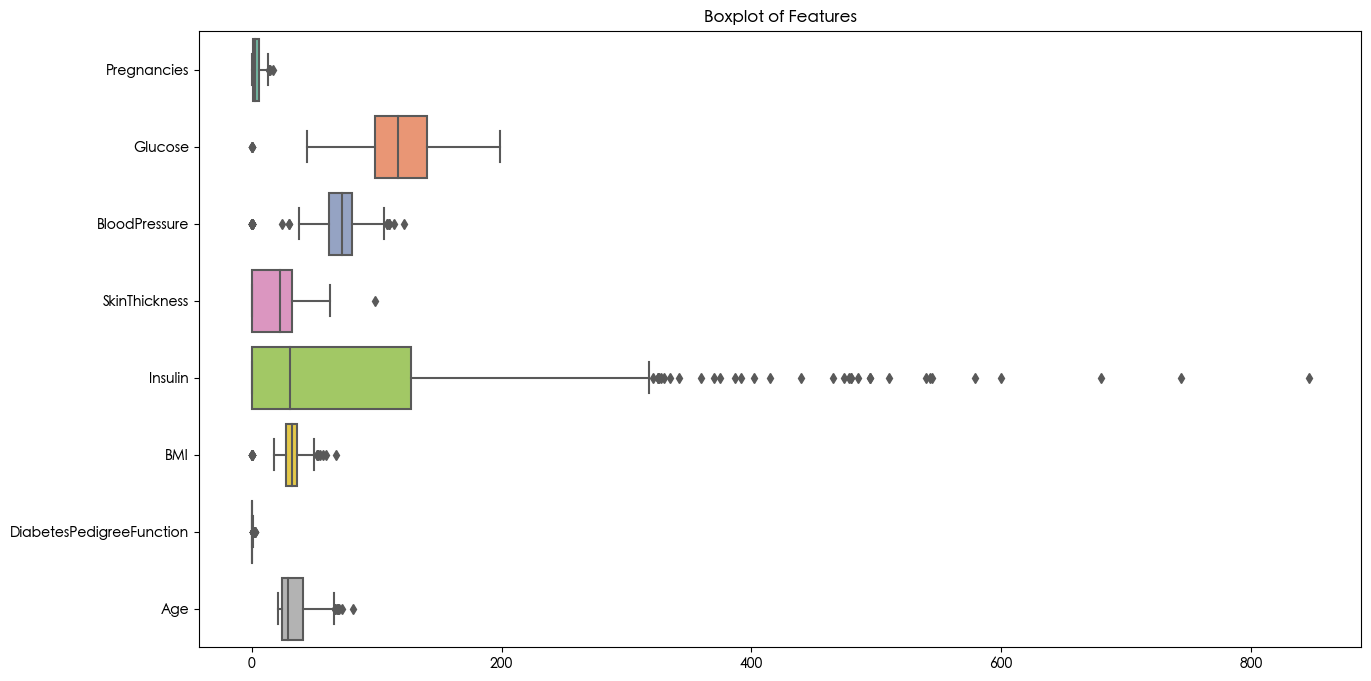

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=diabetes_df.iloc[:, :-1], orient="h", palette="Set2")
plt.title("Boxplot of Features")
plt.show()

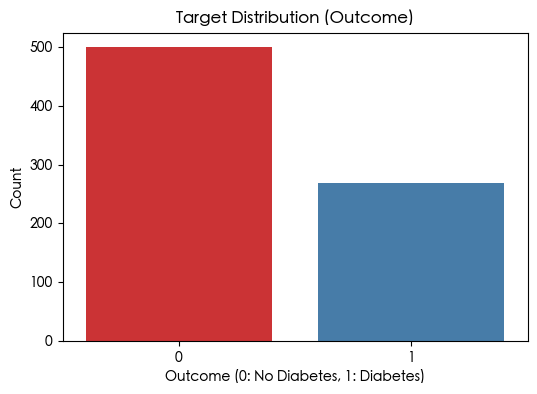

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=diabetes_df, palette="Set1")
plt.title("Target Distribution (Outcome)")
plt.xlabel("Outcome (0: No Diabetes, 1: Diabetes)")
plt.ylabel("Count")
plt.show()

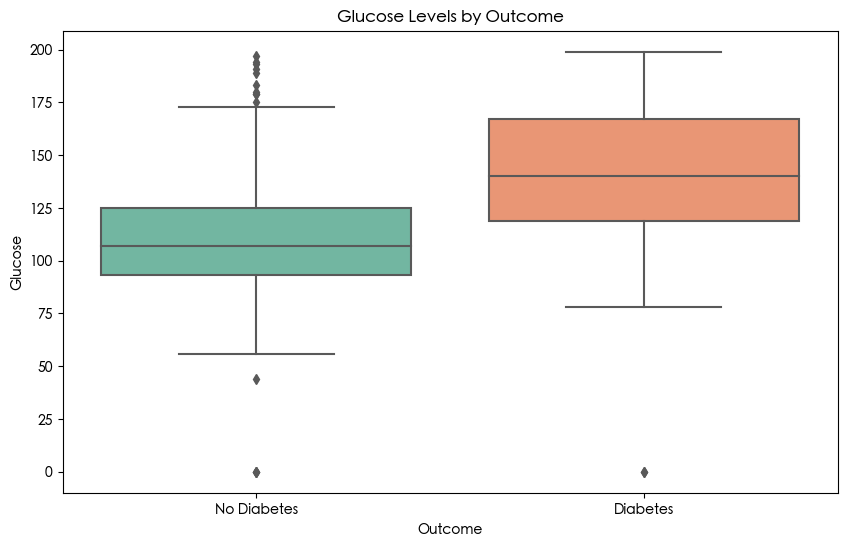

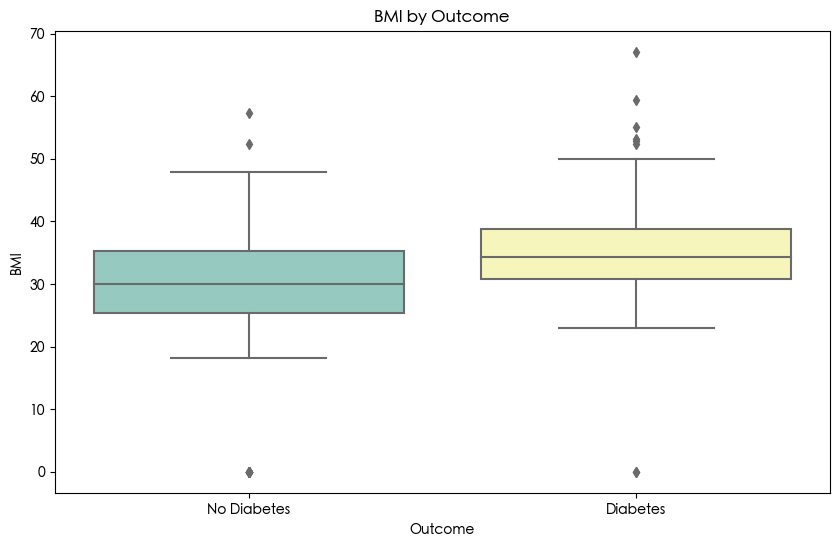

In [ ]:
# Characteristics Glucose Box plot by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df, palette="Set2")
plt.title("Glucose Levels by Outcome")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Characteristics BMI Box plot by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='BMI', data=diabetes_df, palette="Set3")
plt.title("BMI by Outcome")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


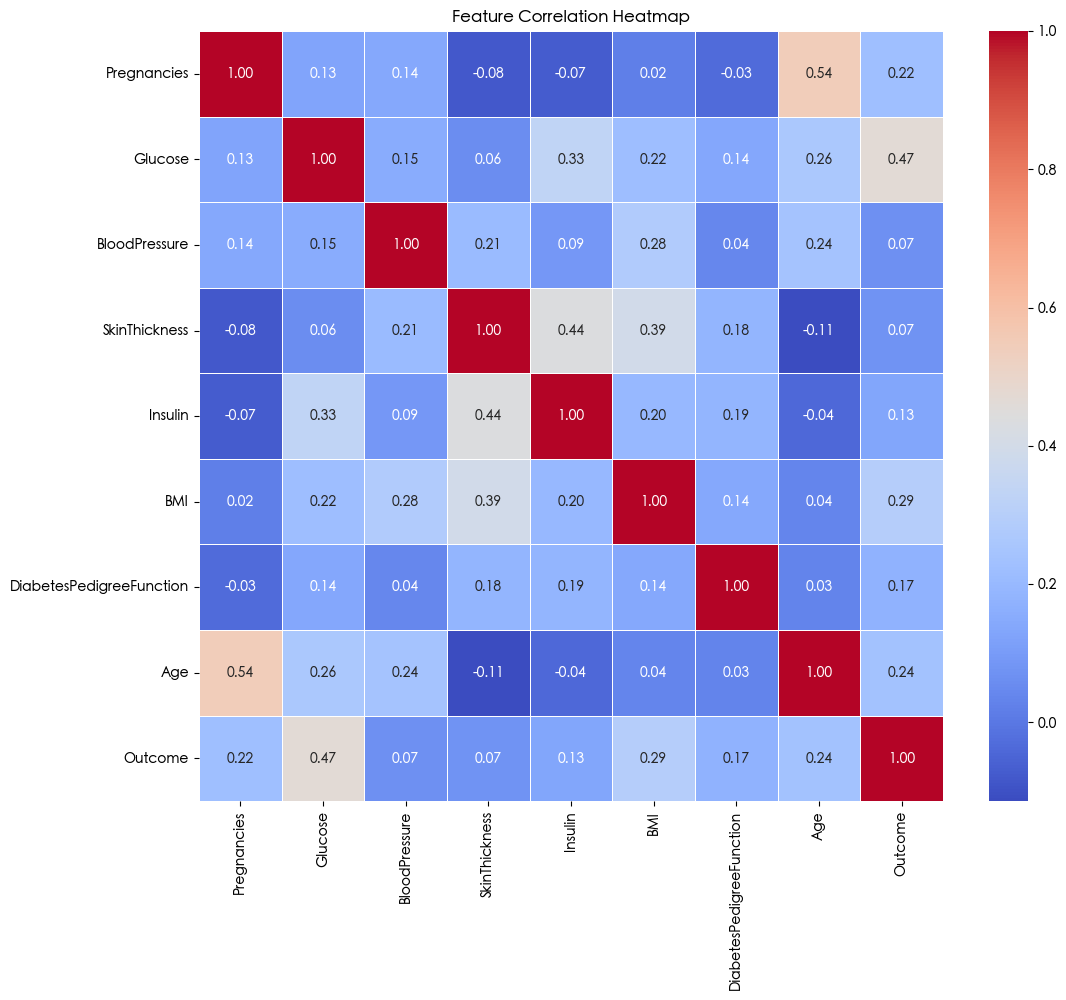

In [ ]:
corr_matrix = diabetes_df.corr()

# Visualise correlation heat maps
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Analysis of Covariance

In [ ]:
# Divide training and test sets
X_breast = breast_df.drop(columns=['target'])
y_breast = breast_df['target']
X_breast_train, X_breast_test, y_breast_train, y_breast_test = train_test_split(
    X_breast, y_breast, test_size=0.2, random_state=42
)

X_diabetes = diabetes_df.drop(columns=['Outcome'])
y_diabetes = diabetes_df['Outcome']
X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

In [ ]:

def run_experiment(X_train, X_test, y_train, y_test, n_runs=10):
    predictions = []
    accuracies = []

    for i in range(n_runs):
        clf = RandomForestClassifier(random_state=i)
        clf.fit(X_train, y_train)
        y_pred = clf.predict_proba(X_test)[:, 1]
        predictions.append(y_pred)
        accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

    pred_df = pd.DataFrame(predictions).T
    pred_df['Mean'] = pred_df.mean(axis=1)
    pred_df['SD'] = pred_df.std(axis=1)
    pred_df['CV'] = pred_df['SD'] / pred_df['Mean']

    return pred_df, accuracies


In [ ]:
# Breast Cancer Data Set Experiment
breast_pred_df, breast_accuracies = run_experiment(
    X_breast_train, X_breast_test, y_breast_train, y_breast_test
)

# Diabetes dataset experiment
diabetes_pred_df, diabetes_accuracies = run_experiment(
    X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test
)


In [ ]:
print("乳腺癌数据集预测变异性：")
print(breast_pred_df[['Mean', 'SD', 'CV']])

print("\n糖尿病数据集预测变异性：")
print(diabetes_pred_df[['Mean', 'SD', 'CV']])


乳腺癌数据集预测变异性：
,      Mean        SD        CV
,0    0.962  0.017776  0.018479
,1    0.000  0.000000       NaN
,2    0.005  0.005000  1.000000
,3    0.999  0.003000  0.003003
,4    1.000  0.000000  0.000000
,..     ...       ...       ...
,109  0.862  0.030265  0.035111
,110  0.009  0.009434  1.048220
,111  0.999  0.003000  0.003003
,112  0.736  0.043174  0.058660
,113  0.000  0.000000       NaN
,
,[114 rows x 3 columns]
,
,糖尿病数据集预测变异性：
,      Mean        SD        CV
,0    0.432  0.052877  0.122401
,1    0.229  0.029138  0.127238
,2    0.129  0.054489  0.422392
,3    0.241  0.035903  0.148974
,4    0.485  0.037749  0.077833
,..     ...       ...       ...
,149  0.761  0.036455  0.047905
,150  0.215  0.028373  0.131965
,151  0.357  0.048384  0.135529
,152  0.397  0.052355  0.131875
,153  0.332  0.057585  0.173448
,
,[154 rows x 3 columns]


In [ ]:
# Calculate the mean of the standard deviation of the predicted variability of the breast cancer dataset.
breast_sd_mean = breast_pred_df['SD'].mean()
print("乳腺癌数据集标准差的平均值：", breast_sd_mean)

# Calculate the mean of the standard deviations of the predicted variabilities of the diabetes dataset.
diabetes_sd_mean = diabetes_pred_df['SD'].mean()
print("\n糖尿病数据集标准差的平均值：", diabetes_sd_mean)


乳腺癌数据集标准差的平均值： 0.014138869694589539
,
,糖尿病数据集标准差的平均值： 0.035894397340838304


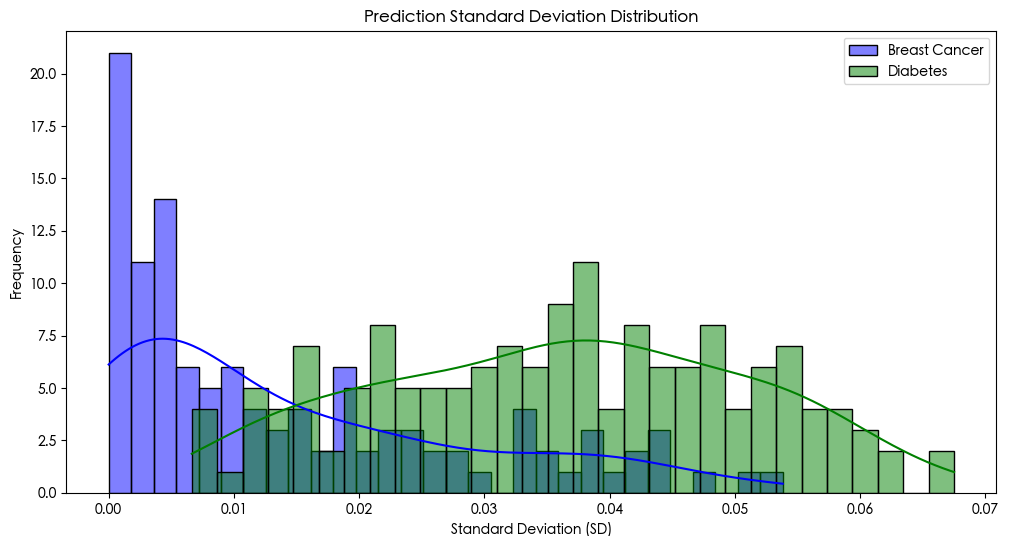

In [ ]:
# standard deviation distribution
plt.figure(figsize=(12, 6))
sns.histplot(breast_pred_df['SD'], bins=30, kde=True, color='blue', label="Breast Cancer")
sns.histplot(diabetes_pred_df['SD'], bins=30, kde=True, color='green', label="Diabetes")
plt.title("Prediction Standard Deviation Distribution")
plt.xlabel("Standard Deviation (SD)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


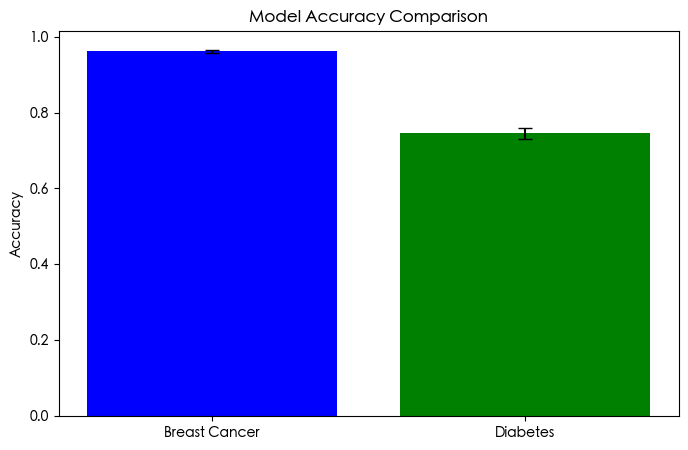

In [ ]:
# Model accuracy distribution
plt.figure(figsize=(8, 5))
plt.bar(['Breast Cancer', 'Diabetes'], [np.mean(breast_accuracies), np.mean(diabetes_accuracies)],
        yerr=[np.std(breast_accuracies), np.std(diabetes_accuracies)], capsize=5, color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
np.mean(breast_accuracies), np.mean(diabetes_accuracies), np.std(breast_accuracies), np.std(diabetes_accuracies)

(0.9614035087719299,
 0.7448051948051948,
 0.004297350425935413,
 0.014241371558091775)

# Variability due to data set

In [ ]:
# Calculate overall statistics for variability indicators
breast_stats = breast_pred_df[['Mean', 'SD', 'CV']].describe()
diabetes_stats = diabetes_pred_df[['Mean', 'SD', 'CV']].describe()

print("乳腺癌数据集变异性统计：")
print(breast_stats)

print("\n糖尿病数据集变异性统计：")
print(diabetes_stats)


乳腺癌数据集变异性统计：
,             Mean          SD          CV
,count  114.000000  114.000000  104.000000
,mean     0.618474    0.014139    0.359239
,std      0.441096    0.014184    0.743153
,min      0.000000    0.000000    0.000000
,25%      0.020000    0.003000    0.005001
,50%      0.924500    0.008972    0.023916
,75%      0.994750    0.022186    0.220499
,max      1.000000    0.053814    3.000000
,
,糖尿病数据集变异性统计：
,             Mean          SD          CV
,count  154.000000  154.000000  154.000000
,mean     0.386123    0.035894    0.197857
,std      0.271908    0.014807    0.208741
,min      0.006000    0.006633    0.024306
,25%      0.134750    0.023775    0.071372
,50%      0.354000    0.036776    0.125421
,75%      0.619500    0.047479    0.241399
,max      0.895000    0.067498    1.105542


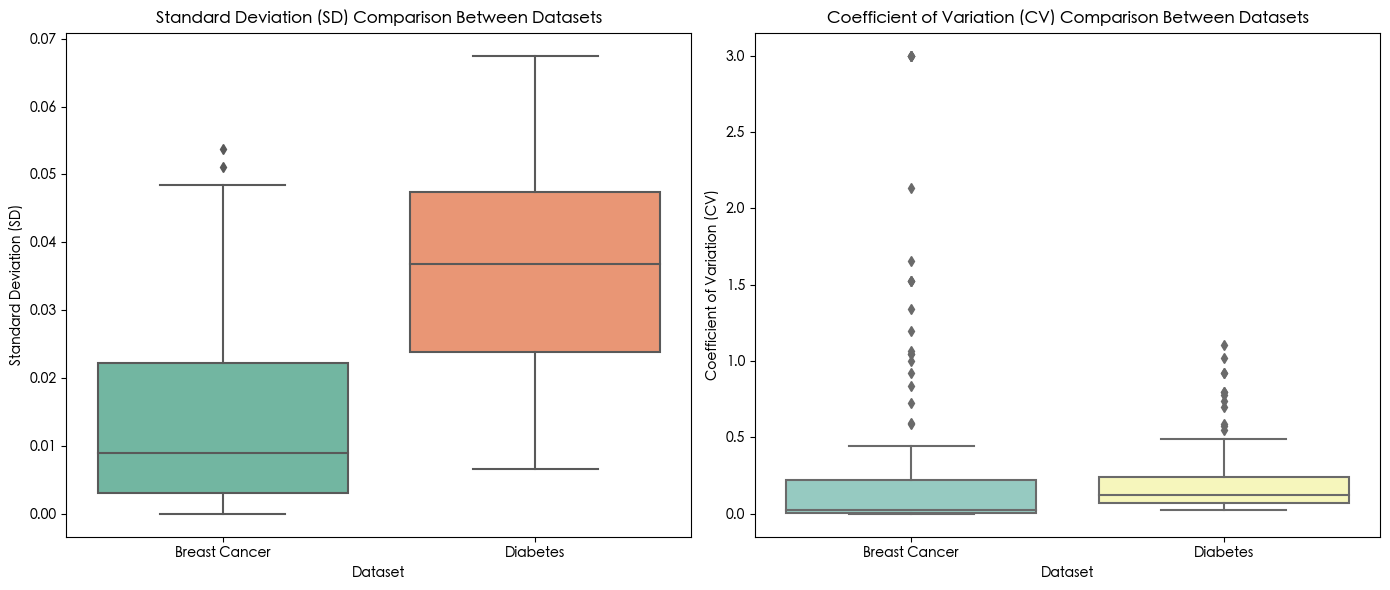

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First box plot: Standard deviation (SD) comparison
sns.boxplot(x='Dataset', y='SD', data=combined_df, palette='Set2', ax=axes[0])
axes[0].set_title("Standard Deviation (SD) Comparison Between Datasets")
axes[0].set_ylabel("Standard Deviation (SD)")

# Second box plot: comparison of coefficients of variation (CV)
sns.boxplot(x='Dataset', y='CV', data=combined_df, palette='Set3', ax=axes[1])
axes[1].set_title("Coefficient of Variation (CV) Comparison Between Datasets")
axes[1].set_ylabel("Coefficient of Variation (CV)")

plt.tight_layout()
plt.show()

乳腺癌数据集大小: (569, 30)
,糖尿病数据集大小: (768, 8)


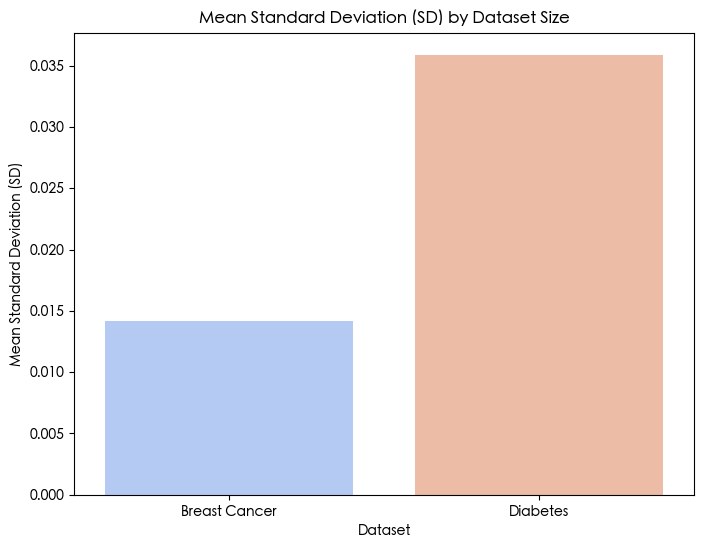

In [ ]:
print(f"乳腺癌数据集大小: {X_breast.shape}")
print(f"糖尿病数据集大小: {X_diabetes.shape}")

# The effect of sample size and number of features on stability
plt.figure(figsize=(8, 6))
sns.barplot(x=['Breast Cancer', 'Diabetes'],
            y=[breast_stats.loc['mean', 'SD'], diabetes_stats.loc['mean', 'SD']],
            palette='coolwarm')
plt.title("Mean Standard Deviation (SD) by Dataset Size")
plt.ylabel("Mean Standard Deviation (SD)")
plt.xlabel("Dataset")
plt.show()


# Variability due to random sampling and feature selection

In [ ]:
def analyze_sampling_feature_selection(X_train, X_test, y_train, y_test, max_features_list, disable_bootstrap=False):
    results = []
    for max_features in max_features_list:
        accuracies = []
        predictions = []
        for seed in range(10):
            clf = RandomForestClassifier(max_features=max_features,
                                         bootstrap=not disable_bootstrap,
                                         random_state=seed)
            clf.fit(X_train, y_train)
            y_pred = clf.predict_proba(X_test)[:, 1]
            predictions.append(y_pred)
            accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

        pred_df = pd.DataFrame(predictions).T
        sd = pred_df.std(axis=1).mean()
        cv = (pred_df.std(axis=1) / pred_df.mean(axis=1)).mean()
        iqr = (pred_df.quantile(0.75, axis=1) - pred_df.quantile(0.25, axis=1)).mean()
        results.append({'max_features': max_features, 'SD': sd, 'CV': cv, 'IQR': iqr, 'Accuracy': np.mean(accuracies)})
    return pd.DataFrame(results)


In [ ]:
# Scene 1: Adjust max_features
max_features_list = [0.2, 0.4, 0.6, 0.8, 1.0]
results_sampling = analyze_sampling_feature_selection(
    X_breast_train, X_breast_test, y_breast_train, y_breast_test, max_features_list
)

# Scene 2: Disable bootstrap and adjust max_features
results_no_bootstrap = analyze_sampling_feature_selection(
    X_breast_train, X_breast_test, y_breast_train, y_breast_test, max_features_list, disable_bootstrap=True
)

print("场景1结果：随机采样与特征选择")
print(results_sampling)

print("\n场景2结果：无引导采样")
print(results_no_bootstrap)


场景1结果：随机采样与特征选择
,   max_features        SD        CV       IQR  Accuracy
,0           0.2  0.014875  0.420344  0.016776  0.963158
,1           0.4  0.012431  0.372893  0.014452  0.957895
,2           0.6  0.012517  0.309599  0.014912  0.956140
,3           0.8  0.012778  0.303168  0.014364  0.956140
,4           1.0  0.011916  0.300574  0.013662  0.956140
,
,场景2结果：无引导采样
,   max_features        SD        CV       IQR  Accuracy
,0           0.2  0.011679  0.340671  0.013684  0.961404
,1           0.4  0.009232  0.130007  0.011711  0.956140
,2           0.6  0.009469  0.083925  0.010899  0.956140
,3           0.8  0.006698  0.107973  0.007675  0.947368
,4           1.0  0.001338  0.003361  0.001491  0.942982


In [ ]:
# Scenario 1: mean of standard deviations of random sampling and feature selection
sampling_sd_mean = results_sampling['SD'].mean()
print("场景1 - 随机采样与特征选择的标准差平均值：", sampling_sd_mean)

# Scenario 2: Standard deviation of unguided sampling
no_bootstrap_sd_mean = results_no_bootstrap['SD'].mean()
print("\n场景2 - 无引导采样的标准差平均值：", no_bootstrap_sd_mean)


场景1 - 随机采样与特征选择的标准差平均值： 0.012903533608216777
,
,场景2 - 无引导采样的标准差平均值： 0.0076833885164780315


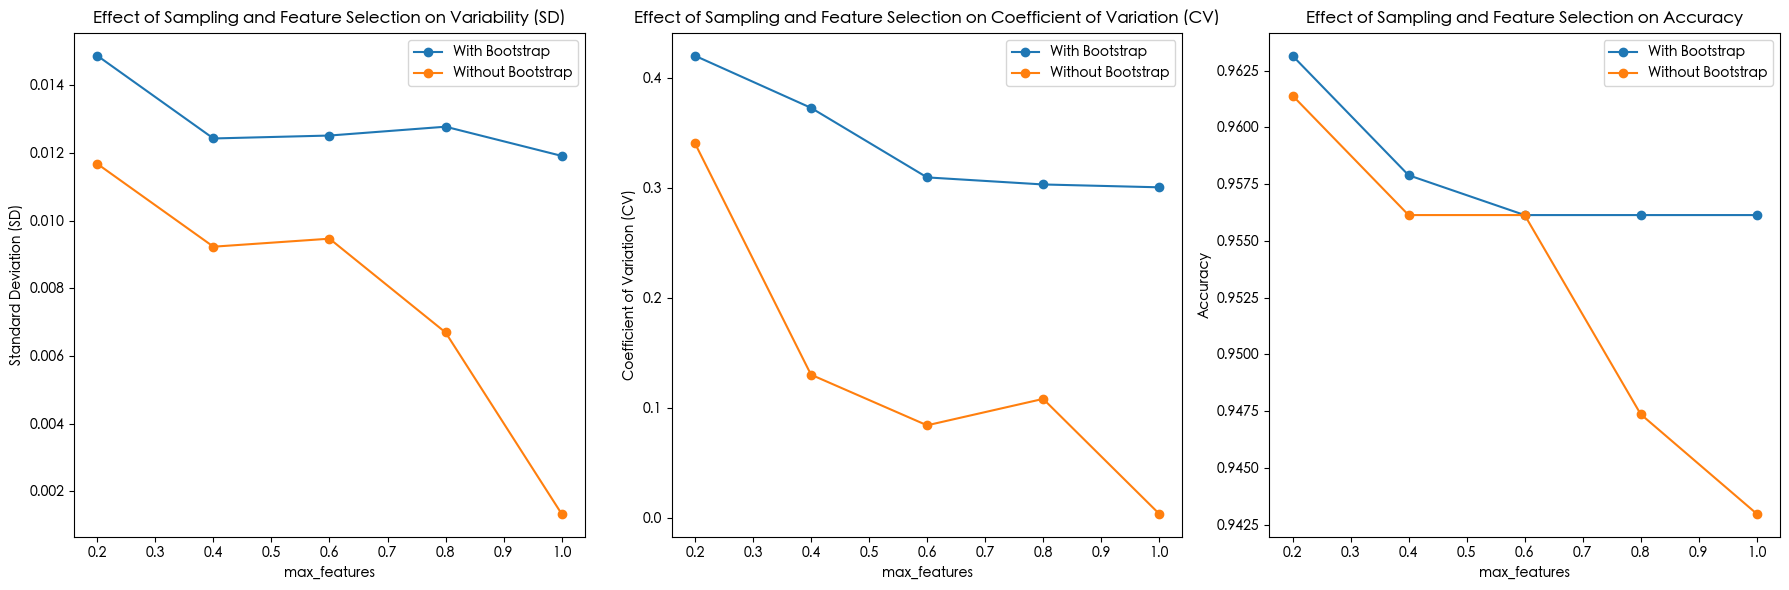

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the standard deviation (SD) (SD)
axes[0].plot(max_features_list, results_sampling['SD'], label='With Bootstrap', marker='o')
axes[0].plot(max_features_list, results_no_bootstrap['SD'], label='Without Bootstrap', marker='o')
axes[0].set_title("Effect of Sampling and Feature Selection on Variability (SD)")
axes[0].set_xlabel("max_features")
axes[0].set_ylabel("Standard Deviation (SD)")
axes[0].legend()

# Plot the CV
axes[1].plot(max_features_list, results_sampling['CV'], label='With Bootstrap', marker='o')
axes[1].plot(max_features_list, results_no_bootstrap['CV'], label='Without Bootstrap', marker='o')
axes[1].set_title("Effect of Sampling and Feature Selection on Coefficient of Variation (CV)")
axes[1].set_xlabel("max_features")
axes[1].set_ylabel("Coefficient of Variation (CV)")
axes[1].legend()

# Plot the Accuracy
axes[2].plot(max_features_list, results_sampling['Accuracy'], label='With Bootstrap', marker='o')
axes[2].plot(max_features_list, results_no_bootstrap['Accuracy'], label='Without Bootstrap', marker='o')
axes[2].set_title("Effect of Sampling and Feature Selection on Accuracy")
axes[2].set_xlabel("max_features")
axes[2].set_ylabel("Accuracy")
axes[2].legend()

plt.tight_layout()
plt.show()


In [ ]:
def analyze_hyperparameter_effect(X_train, X_test, y_train, y_test, depths, n_estimators_list):
    results = []
    for depth in depths:
        for n_estimators in n_estimators_list:
            accuracies = []
            predictions = []
            for seed in range(10):  # 10次运行
                clf = RandomForestClassifier(max_depth=depth,
                                             n_estimators=n_estimators,
                                             random_state=seed)
                clf.fit(X_train, y_train)
                y_pred = clf.predict_proba(X_test)[:, 1]
                predictions.append(y_pred)
                accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

            pred_df = pd.DataFrame(predictions).T
            sd = pred_df.std(axis=1).mean()
            cv = (pred_df.std(axis=1) / pred_df.mean(axis=1)).mean()
            iqr = (pred_df.quantile(0.75, axis=1) - pred_df.quantile(0.25, axis=1)).mean()
            results.append({'Depth': depth, 'Estimators': n_estimators, 'SD': sd, 'CV': cv, 'IQR': iqr, 'Accuracy': np.mean(accuracies)})
    return pd.DataFrame(results)


In [ ]:
depths = [2, 4, 6, 8, None]
n_estimators_list = [100, 200, 300]
results_hyperparams = analyze_hyperparameter_effect(
    X_breast_train, X_breast_test, y_breast_train, y_breast_test, depths, n_estimators_list
)

print("超参数调优结果：")
print(results_hyperparams)


超参数调优结果：
,    Depth  Estimators        SD        CV       IQR  Accuracy
,0     2.0         100  0.012269  0.066925  0.014693  0.963158
,1     2.0         200  0.008850  0.050879  0.010787  0.964035
,2     2.0         300  0.007273  0.042553  0.009078  0.964035
,3     4.0         100  0.011169  0.182455  0.013635  0.964035
,4     4.0         200  0.008197  0.130029  0.010009  0.964035
,5     4.0         300  0.006805  0.106232  0.008219  0.964035
,6     6.0         100  0.013168  0.414156  0.015873  0.963158
,7     6.0         200  0.009429  0.366907  0.011478  0.964912
,8     6.0         300  0.007539  0.341349  0.008828  0.964912
,9     8.0         100  0.014845  0.368046  0.016742  0.962281
,10    8.0         200  0.010732  0.306958  0.012914  0.963158
,11    8.0         300  0.008536  0.282789  0.010985  0.964035
,12    NaN         100  0.014904  0.378672  0.017105  0.961404
,13    NaN         200  0.010867  0.318645  0.013125  0.964035
,14    NaN         300  0.008530  0.283842  0.

In [ ]:
# Calculate the mean of a standard deviation column
sd_mean = results_hyperparams['SD'].mean()
print("标准差的平均值：", sd_mean)


标准差的平均值： 0.010207407704203931


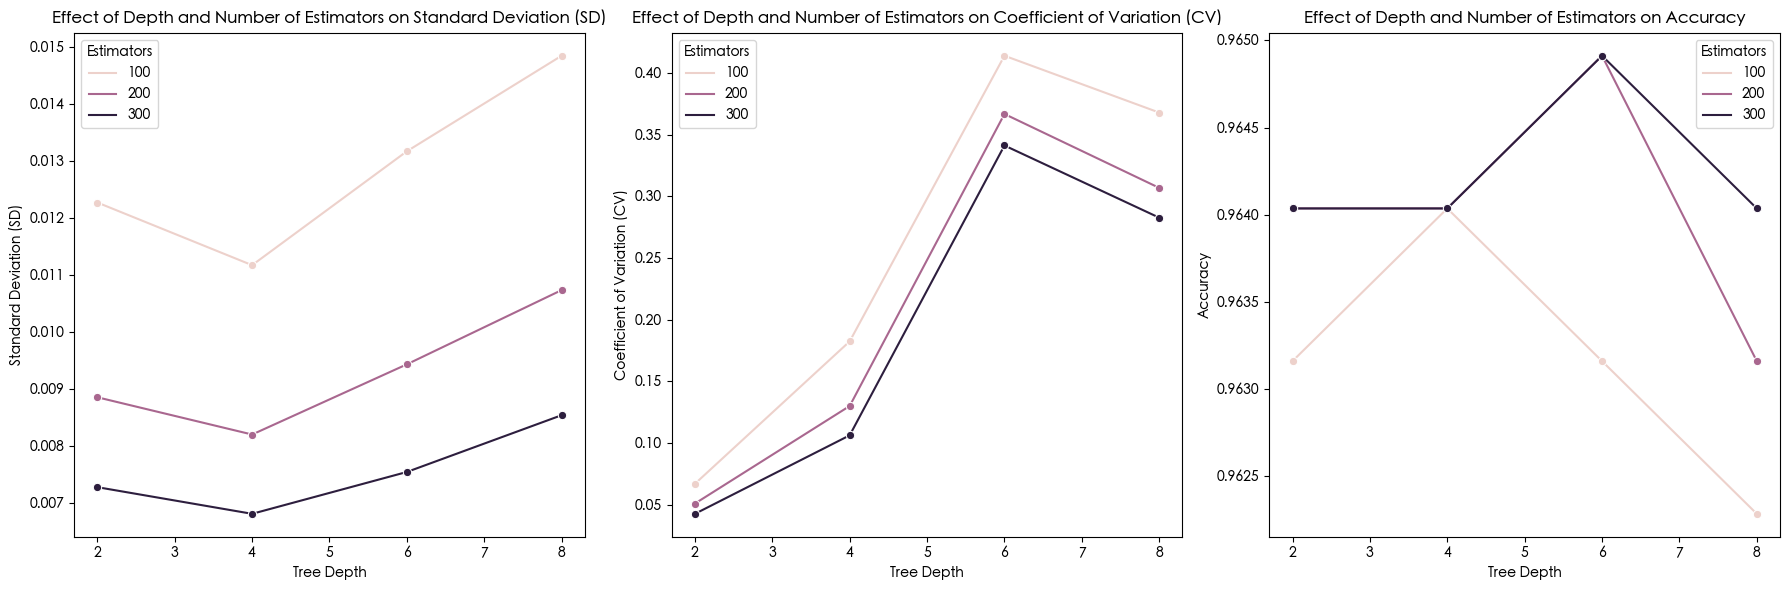

In [ ]:
plt.figure(figsize=(18, 6))

# Plot the standard deviation (SD) change graph
plt.subplot(1, 3, 1)
sns.lineplot(data=results_hyperparams, x='Depth', y='SD', hue='Estimators', marker='o')
plt.title("Effect of Depth and Number of Estimators on Standard Deviation (SD)")
plt.xlabel("Tree Depth")
plt.ylabel("Standard Deviation (SD)")

# Plot the coefficient of variation (CV) changes
plt.subplot(1, 3, 2)
sns.lineplot(data=results_hyperparams, x='Depth', y='CV', hue='Estimators', marker='o')
plt.title("Effect of Depth and Number of Estimators on Coefficient of Variation (CV)")
plt.xlabel("Tree Depth")
plt.ylabel("Coefficient of Variation (CV)")

# Plot the accuracy rate change graph
plt.subplot(1, 3, 3)
sns.lineplot(data=results_hyperparams, x='Depth', y='Accuracy', hue='Estimators', marker='o')
plt.title("Effect of Depth and Number of Estimators on Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()


In [ ]:
# Stability is assessed using a 10% cross-validation.
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Initialise random forest classifier
clf = RandomForestClassifier(random_state=42)

# 10-fold cross-validation using cross_validate
cv_results = cross_validate(clf, X_breast, y_breast, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True)

# output result
print("10折交叉验证结果：")
print(pd.DataFrame(cv_results))



10折交叉验证结果：
,   fit_time  score_time  test_accuracy  train_accuracy  test_precision  \
,0  0.125976    0.005514       0.982456             1.0        1.000000   
,1  0.120288    0.007702       0.894737             1.0        0.914286   
,2  0.134058    0.006493       0.947368             1.0        0.945946   
,3  0.134624    0.005662       0.947368             1.0        0.923077   
,4  0.161747    0.005627       1.000000             1.0        1.000000   
,5  0.145548    0.005716       0.982456             1.0        1.000000   
,6  0.142545    0.008206       0.947368             1.0        0.945946   
,7  0.139330    0.006512       0.982456             1.0        0.972973   
,8  0.103166    0.004993       0.947368             1.0        0.971429   
,9  0.105498    0.005209       1.000000             1.0        1.000000   
,
,   train_precision  test_recall  train_recall   test_f1  train_f1  
,0              1.0     0.971429           1.0  0.985507       1.0  
,1              1.0     

/Users/wuzonglin/opt/anaconda3/envs/e1/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
,  plot_data = [np.asarray(s, float) for k, s in iter_data]


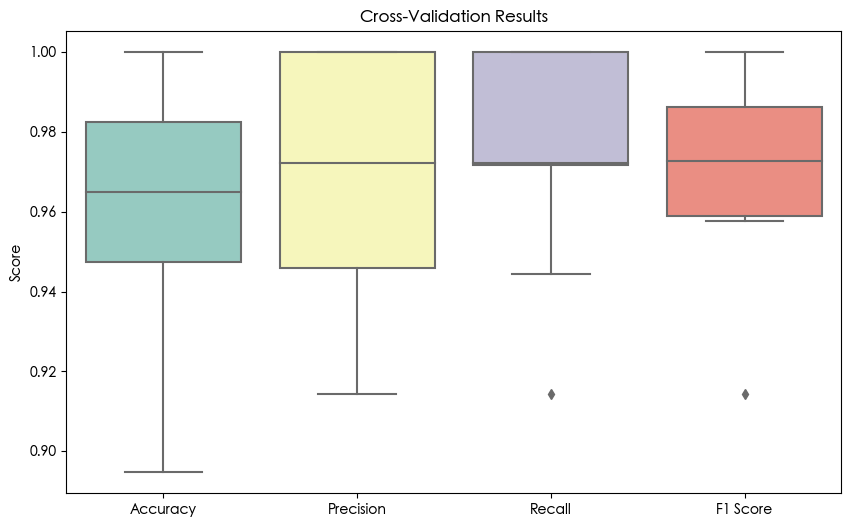

In [ ]:
# Plot the stability distribution

test_scores = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'],
    'Precision': cv_results['test_precision'],
    'Recall': cv_results['test_recall'],
    'F1 Score': cv_results['test_f1']
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=test_scores, palette="Set3")
plt.title("Cross-Validation Results")
plt.ylabel("Score")
plt.show()
